In [9]:
import pandas as pd
import math

In [10]:
all_posts_df = pd.read_json('right_all_posts.json', lines=True)

In [11]:
# convertendo o tipo data que esta como string em objeto no formato data
all_posts_df["created_time"] = pd.to_datetime(all_posts_df['created_time'])

In [12]:

def extract_shares_property(share_object):
    try:
        return share_object["count"]
    except:
        return 0

def extract_reaction_property(object):
    try:
        return object["summary"]["total_count"]
    except:
        return 0


all_posts_df['shares'] = all_posts_df['shares'].apply(lambda x:extract_shares_property(x))
all_posts_df['reactions_like'] = all_posts_df['reactions_like'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_haha'] = all_posts_df['reactions_haha'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_wow'] = all_posts_df['reactions_wow'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_sad'] = all_posts_df['reactions_sad'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_angry'] = all_posts_df['reactions_angry'].apply(lambda x:extract_reaction_property(x))
all_posts_df['reactions_love'] = all_posts_df['reactions_love'].apply(lambda x:extract_reaction_property(x))

all_posts_df

,created_time,id,message,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love
0,2018-01-01 05:18:07+00:00,8.907111e+30,"Moro Nega, Mais Uma Vez, Pedido Da Defesa De L...",48,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,429,15,0,0,2,16
1,2018-01-01 03:14:06+00:00,8.907111e+30,RETROSPECTIVA 2017 -Abaixo-assinado em apoio a...,207,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,885,2,2,0,0,36
2,2018-01-01 02:37:05+00:00,8.907111e+30,RETROSPECTIVA 2017 -Abaixo-assinado online que...,40,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,131,3,0,0,1,3
3,2018-03-04 18:25:16+00:00,8.907111e+30,Filha e neta de Lula ficam fora das eleições d...,28,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,68,19,2,0,1,3
4,2018-03-04 15:35:21+00:00,8.907111e+30,Pezão deve se tornar o 1º governador denunciad...,245,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,496,26,5,0,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...
49514,2021-10-17 18:20:20+00:00,1.708331e+31,Fafá de Belém disse que prepararia maniçoba pa...,46,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,93,4,1,8,34,0
49515,2021-10-17 16:45:29+00:00,1.708331e+31,Revista faz post tentando justificar sua capa ...,118,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,350,30,3,3,29,1
49516,2021-10-17 11:44:20+00:00,1.708331e+31,confira,24,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,172,0,1,0,0,1
49517,2021-10-17 02:44:44+00:00,1.708331e+31,mais um absurdo contra conservadores veio à tona,115,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,272,0,5,16,74,1


In [13]:
column_names = ['shares', 'reactions_like', 'reactions_haha', 'reactions_wow','reactions_sad','reactions_angry','reactions_love']
all_posts_df['total_reactions']= all_posts_df[column_names].sum(axis=1)
all_posts_df

,created_time,id,message,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,total_reactions
0,2018-01-01 05:18:07+00:00,8.907111e+30,"Moro Nega, Mais Uma Vez, Pedido Da Defesa De L...",48,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,429,15,0,0,2,16,510
1,2018-01-01 03:14:06+00:00,8.907111e+30,RETROSPECTIVA 2017 -Abaixo-assinado em apoio a...,207,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,885,2,2,0,0,36,1132
2,2018-01-01 02:37:05+00:00,8.907111e+30,RETROSPECTIVA 2017 -Abaixo-assinado online que...,40,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,131,3,0,0,1,3,178
3,2018-03-04 18:25:16+00:00,8.907111e+30,Filha e neta de Lula ficam fora das eleições d...,28,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,68,19,2,0,1,3,121
4,2018-03-04 15:35:21+00:00,8.907111e+30,Pezão deve se tornar o 1º governador denunciad...,245,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,496,26,5,0,7,27,806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49514,2021-10-17 18:20:20+00:00,1.708331e+31,Fafá de Belém disse que prepararia maniçoba pa...,46,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,93,4,1,8,34,0,186
49515,2021-10-17 16:45:29+00:00,1.708331e+31,Revista faz post tentando justificar sua capa ...,118,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,350,30,3,3,29,1,534
49516,2021-10-17 11:44:20+00:00,1.708331e+31,confira,24,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,172,0,1,0,0,1,198
49517,2021-10-17 02:44:44+00:00,1.708331e+31,mais um absurdo contra conservadores veio à tona,115,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,272,0,5,16,74,1,483


In [14]:
# def get_year(date):
#    print(date)
#    print(type(date))
#    return date.year

# df_to_group_by_year = all_posts_df.apply(lambda date:get_year(date))
# df_to_group_by_year
df_to_group_by_year = all_posts_df
df_to_group_by_year['created_time'] = df_to_group_by_year['created_time'].dt.year

grouped_by_year = df_to_group_by_year.groupby(['created_time',pd.Grouper(key='created_time')]).sum()
grouped_by_year.reset_index(level=0, inplace=True)
grouped_by_year

,created_time,id,shares,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,total_reactions
created_time,,,,,,,,,,
2018,2018,1.099081e+35,23431892,15625173,1913483,149623,164505,661160,1008737,42954573
2019,2019,1.097898e+35,15466669,20878209,1870611,159767,147641,476728,1622384,40622009
2020,2020,8.538722e+34,9266566,26529262,1374242,78696,92328,442435,1828592,39612121
2021,2021,7.529089e+34,6372534,27948833,1362047,60179,104946,287583,1965646,38101768


In [15]:
def convert_item_to_str(item):
    return str(item)

grouped_by_year['created_time'] = grouped_by_year['created_time'].apply(lambda item:convert_item_to_str(item))
# grouped_by_year['reactions_like'] = grouped_by_year['reactions_like'].apply(lambda item:convert_item_to_str(item))
# grouped_by_year['shares'] = grouped_by_year['shares'].apply(lambda item:convert_item_to_str(item))
# grouped_by_year['total_reactions'] = grouped_by_year['total_reactions'].apply(lambda item:convert_item_to_str(item))

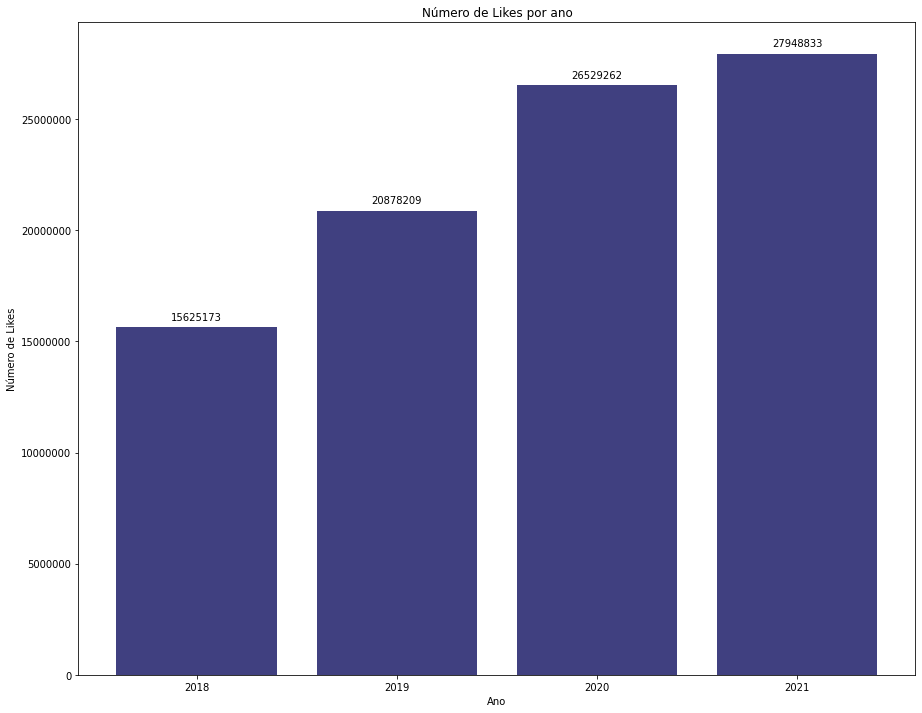

In [16]:
import matplotlib.pyplot as plt
import numpy as np # importing numpy
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12))

# Add x-axis and y-axis
#ax.bar(grouped_by_year['created_time'],
#    grouped_by_year['reactions_like'],
#       color='purple')

ax.bar(grouped_by_year['created_time'],grouped_by_year['reactions_like'],
       color='#404080')

# Set title and labels for axes
ax.set(xlabel="Ano",
       ylabel="Número de Likes",
       title="Número de Likes por ano")
plt.ticklabel_format(style='plain', axis='y')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()

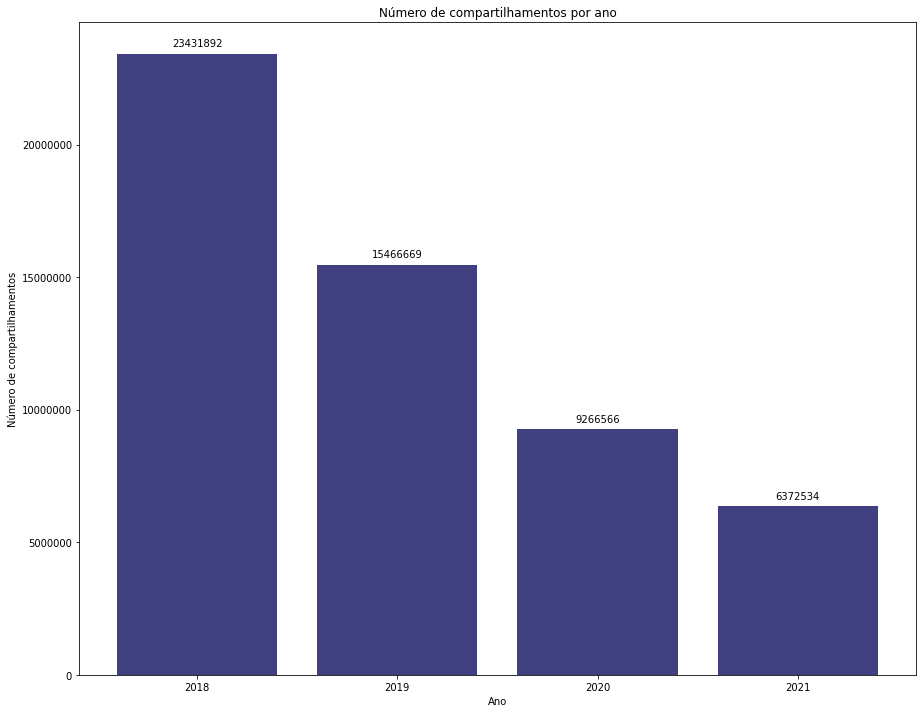

In [17]:

import matplotlib.pyplot as plt
import numpy as np # importing numpy
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12))

# Add x-axis and y-axis
#ax.bar(grouped_by_year['created_time'],
#    grouped_by_year['reactions_like'],
#       color='purple')

ax.bar(grouped_by_year['created_time'],grouped_by_year['shares'],
       color='#404080')

# Set title and labels for axes
ax.set(xlabel="Ano",
       ylabel="Número de compartilhamentos",
       title="Número de compartilhamentos por ano")
plt.ticklabel_format(style='plain', axis='y')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()

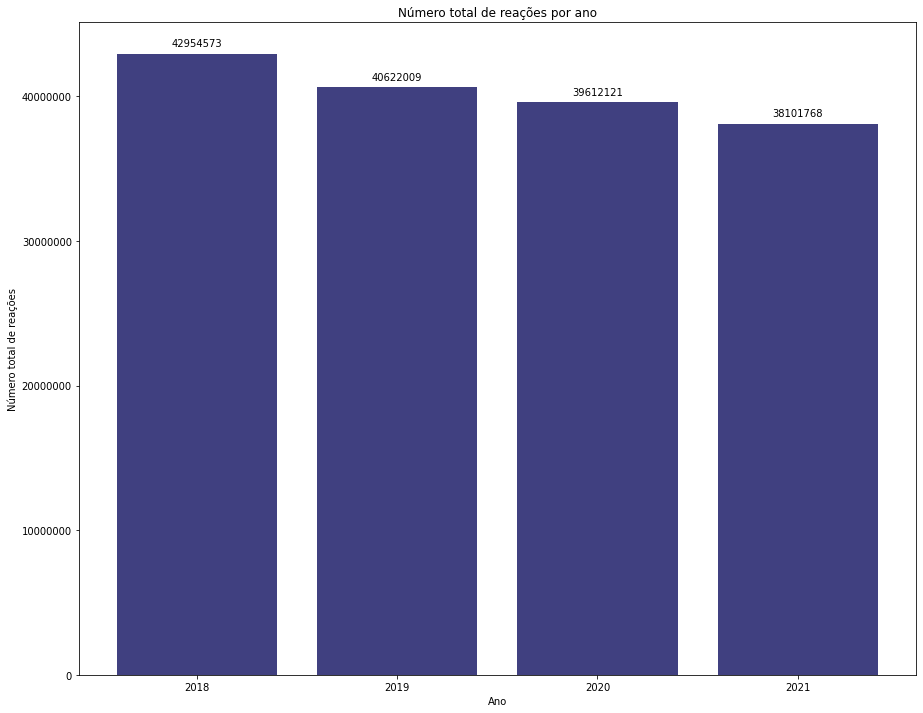

In [18]:

import matplotlib.pyplot as plt
import numpy as np # importing numpy
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12))

# Add x-axis and y-axis
#ax.bar(grouped_by_year['created_time'],
#    grouped_by_year['reactions_like'],
#       color='purple')

ax.bar(grouped_by_year['created_time'],grouped_by_year['total_reactions'],
       color='#404080')

# Set title and labels for axes
ax.set(xlabel="Ano",
       ylabel="Número total de reações",
       title="Número total de reações por ano")
plt.ticklabel_format(style='plain', axis='y')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()